In [12]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [9]:
train_file = "data/dji/dji.csv"
# names=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
df_train = pd.read_csv(train_file, sep=",", header=0, usecols=[0, 1, 2, 3])
l_train = len(df_train)
print("Length of training data: %d"%(l_train))


Length of training data: 567


In [10]:
df_train.head(5)

,Date,Open,High,Low
0,40179,10430.69043,10612.37012,10430.690430
1,40186,10606.40039,10723.76953,10554.330080
2,40193,10706.99023,10729.88965,10374.690430
3,40200,10389.58008,10389.58008,10055.080080
4,40207,10122.04004,10314.83984,9998.030273


In [7]:
df_train.text = df_train.text.str.lower()
df_train.label = df_train.label.str.lower()

In [5]:
df_train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,Date,Open,High,Low,Close,Adj Close,Volume
1,40179,10430.69043,10612.37012,10430.69043,10606.86035,10606.86035,771750000
2,40186,10606.40039,10723.76953,10554.33008,10710.54981,10710.54981,1014940000
3,40193,10706.99023,10729.88965,10374.69043,10389.87988,10389.87988,1062640000
4,40200,10389.58008,10389.58008,10055.08008,10120.45996,10120.45996,1258470000
5,40207,10122.04004,10314.83984,9998.030273,10002.17969,10002.17969,1255650000
6,40214,10003.69043,10161.57031,9835.089844,10144.19043,10144.19043,1133870000
7,40221,10137.23047,10406.58008,9983.820313,10392.90039,10392.90039,909990000
8,40228,10387.76953,10438.54981,10185.83008,10321.03027,10321.03027,1014930000
9,40235,10321.41016,10469.54004,10272.29004,10444.13965,10444.13965,1022080000


In [6]:
null_check = df_train.isna().sum()
print("Null check on training data:")
print(null_check)


Null check on training data:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
print("Original data:")
df_train.head(5)

Original data:


,Date,Open,High,Low,Close,Adj Close,Volume
0,Date,Open,High,Low,Close,Adj Close,Volume
1,40179,10430.69043,10612.37012,10430.69043,10606.86035,10606.86035,771750000
2,40186,10606.40039,10723.76953,10554.33008,10710.54981,10710.54981,1014940000
3,40193,10706.99023,10729.88965,10374.69043,10389.87988,10389.87988,1062640000
4,40200,10389.58008,10389.58008,10055.08008,10120.45996,10120.45996,1258470000


In [8]:
#df_train.dropna(axis=0, how='any', inplace=True)
# df_train.fillna(-1, inplace=True)
# print("New data (after dropping rows with NaN):")
# df_train.head(5)

In [12]:
print("Label distribution of training data:")
print((df_train.label.value_counts()/l_train))

Label distribution of training data:
ham     0.865937
spam    0.134063
Name: label, dtype: float64


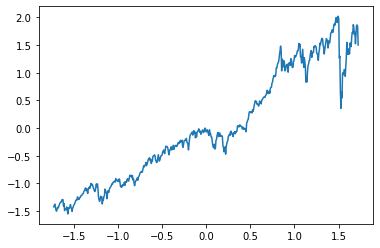

In [26]:
%matplotlib inline

index_data = df_train

# scales the data to smaller values
index_data=scale(index_data)

#gets the price and dates from the matrix
prices = index_data[:, 1].reshape(-1, 1)
dates = index_data[:, 0].reshape(-1, 1)

#creates a plot of the data and then displays it
plt.plot(dates[:, 0], prices[:, 0])
plt.show()

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
traindev = df_train[["Date", "Open"]].sample(frac=1,random_state=1).reset_index(drop=True)
# train, dev, test = np.split(traindev, [int(.6*len(df)), int(.8*len(df))])
train, dev = train_test_split(traindev, test_size=0.3)
train = train.reset_index(drop=True).sort_values(by='Date')
dev = dev.reset_index(drop=True).sort_values(by='Date')

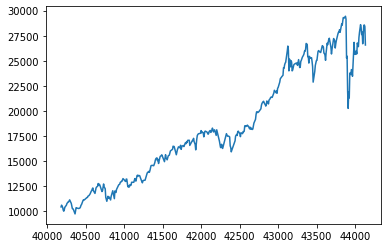

In [67]:
train_data = train

#gets the price and dates from the matrix
prices = train_data["Open"]
dates = train_data["Date"]

#creates a plot of the data and then displays it
plt.plot(dates, prices)
plt.show()

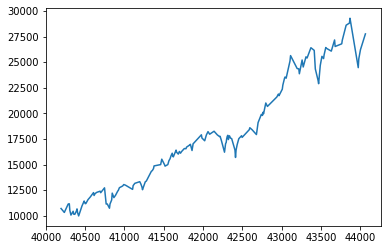

In [68]:
test_data = dev

#gets the price and dates from the matrix
prices = test_data["Open"]
dates = test_data["Date"]

#creates a plot of the data and then displays it
plt.plot(dates, prices)
plt.show()

In [69]:
train.to_csv("data/dji/train.csv", index=False)
dev.to_csv("data/dji/test.csv", index=False)